# Creating Usable Datasets for Models

importing Jupyter notebook from Self_Written_Functions_Sheet.ipynb
importing Jupyter notebook from ML_HousingPrice_EDA_and_Basic_Imputation_Recover.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null  

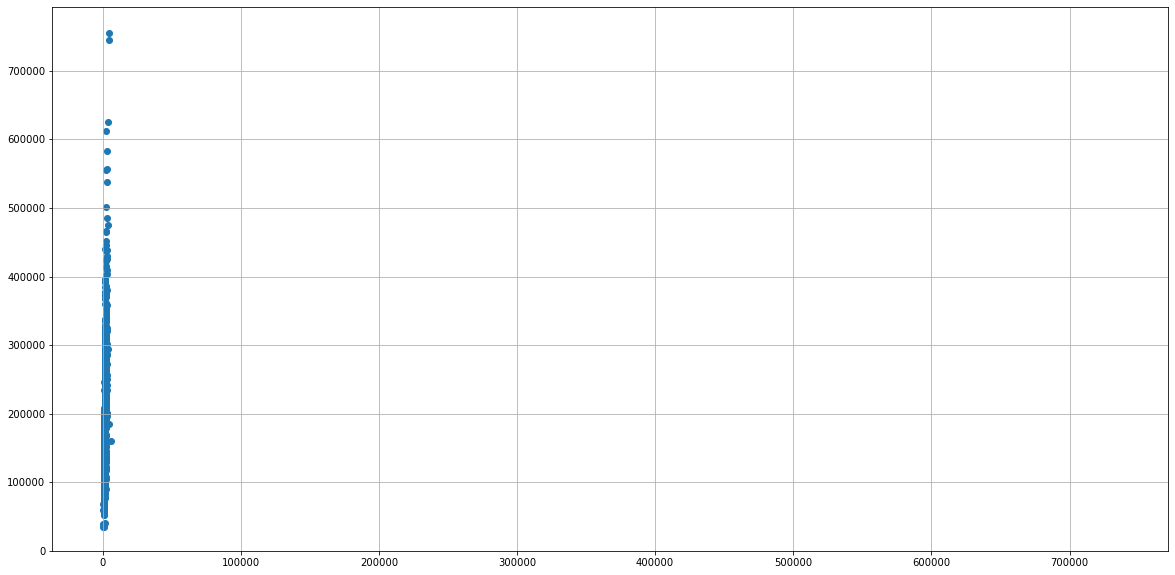

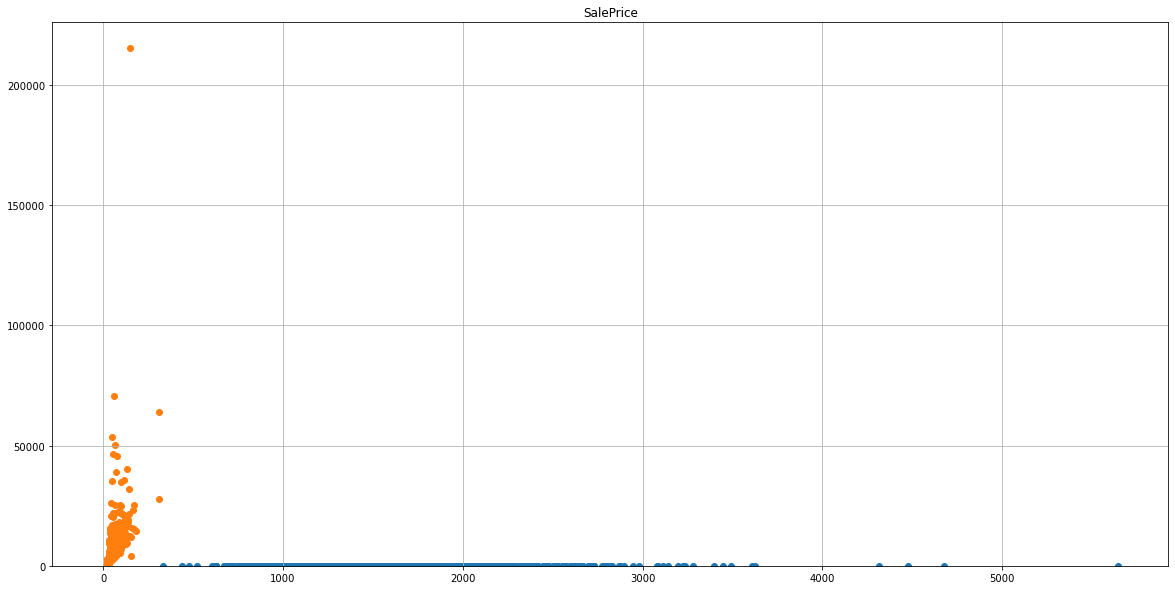

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.feature_selection import chi2, f_regression, f_classif, mutual_info_classif, mutual_info_regression 
from sklearn.feature_selection import SelectKBest, SelectFromModel, VarianceThreshold
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
from sklearn import neighbors
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import model_selection as ms
sklearn.set_config(print_changed_only=False)

from matplotlib import pyplot as plt

import import_ipynb
from Self_Written_Functions_Sheet import col_obj_list, nan_col_list, cols_nan_unique, nan_col_obj_list_fillna, fill_masvnrtype
from Self_Written_Functions_Sheet import rmse, conversion

from ML_HousingPrice_EDA_and_Basic_Imputation_Recover import hp_saleprice, hp_logsaleprice, hp

In [2]:
hp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalBaths,BsmtBaths,BsmtFinTotalSF,BsmtUnfin,2ndFlr,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold
0,1,60,RL,65.0,8450,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,DNE,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,DNE,DNE,DNE,0,2,2008,WD,Normal,2.5,1.0,706,1,1,0,61,1,0,5
1,2,20,RL,80.0,9600,Pave,DNE,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,DNE,DNE,DNE,0,5,2007,WD,Normal,2.0,0.5,978,1,0,0,0,0,1,31
2,3,60,RL,68.0,11250,Pave,DNE,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,DNE,DNE,DNE,0,9,2008,WD,Normal,2.5,1.0,486,1,1,0,42,1,0,6
3,4,70,RL,60.0,9550,Pave,DNE,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,DNE,DNE,DNE,0,2,2006,WD,Abnorml,1.0,1.0,216,1,1,0,307,1,0,36
4,5,60,RL,84.0,14260,Pave,DNE,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,DNE,DNE,DNE,0,12,2008,WD,Normal,2.5,1.0,655,1,1,0,84,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,DNE,DNE,DNE,0,8,2007,WD,Normal,2.5,0.0,0,1,1,0,40,1,0,7
1456,1457,20,RL,85.0,13175,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,DNE,MnPrv,DNE,0,2,2010,WD,Normal,2.0,1.0,953,1,0,0,0,0,1,22
1457,1458,70,RL,66.0,9042,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attch

In [3]:
hp.loc[:, hp.isnull().any()]

,LotFrontage
0,65.0
1,80.0
2,68.0
3,60.0
4,84.0
...,...
1455,62.0
1456,85.0
1457,66.0
1458,68.0


# Lot Frontage Imputation

In [4]:
# dummify the variables
hp_dum = pd.get_dummies(hp, drop_first=True)

# one hot encoding for mssubclass since it is numeric
enc = OneHotEncoder(drop='first')
enc.fit(hp_dum[['MSSubClass']])

oh_labels = enc.transform(hp_dum[['MSSubClass']]).toarray()
mssubcl_dum = pd.DataFrame(oh_labels)

mssubcl_dum.columns = enc.get_feature_names(['MSSubClass'])

# Concatenate the dataframes and drop Id and original MSSubClass
hp_dum = pd.concat([hp_dum, mssubcl_dum], axis=1, sort=False)
hp_dum = hp_dum.drop(['Id', 'MSSubClass'], axis=1)
hp_dum

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalBaths,BsmtBaths,BsmtFinTotalSF,BsmtUnfin,2ndFlr,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_DNE,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_DNE,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_DNE,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_DNE,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleT

In [5]:
hp_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 282 entries, LotFrontage to MSSubClass_190
dtypes: float64(19), int64(40), uint8(223)
memory usage: 991.0 KB


In [6]:
hp_dum.isnull().sum().sum()

259

### Separate LotFrontage from the rest of the features

In [7]:
hp_lf = hp[['LotFrontage']]
hp_dum_nolf = hp_dum.drop(['LotFrontage'], axis=1)

lf_isnull = list(hp_lf.loc[hp_lf.LotFrontage.isna()].index)

lf_notnull = list(hp_lf.loc[hp_lf.LotFrontage.notna()].index)

hp_dum_nolf_train = hp_dum_nolf.iloc[lf_notnull]
hp_dum_lf_train = hp_lf.iloc[lf_notnull]

hp_dum_nolf_null = hp_dum_nolf.iloc[lf_isnull]
hp_dum_lf_null = hp_lf.iloc[lf_isnull]

In [8]:
hp_dum_lf_train

,LotFrontage
0,65.0
1,80.0
2,68.0
3,60.0
4,84.0
...,...
1455,62.0
1456,85.0
1457,66.0
1458,68.0


In [9]:
hp_dum_lf_null

,LotFrontage
7,NaN
12,NaN
14,NaN
16,NaN
24,NaN
...,...
1429,NaN
1431,NaN
1441,NaN
1443,NaN


### Get list of columns that have dtype != object

In [10]:
cols_obj_dum = []
cols_num_dum = []

# the function below creates a list of column names with dtype=='object'
# and a list of column names with dtype!='object'
col_obj_list(hp, hp.columns, cols_obj_dum, cols_num_dum)

# we are removing Id and MSSubclass
    # Id because it has no bearing on the result
    # MSSubClass because it is categorical
cols_num_dum.remove('Id')
cols_num_dum.remove('MSSubClass')
cols_num_dum

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'TotalBaths',
 'BsmtBaths',
 'BsmtFinTotalSF',
 'BsmtUnfin',
 '2ndFlr',
 'LowQualFin',
 'TotalPorchSF',
 'Porches',
 'Decks',
 'YrsRemodToSold']

### Create DF of dtype != Object for standardization

In [11]:
hp_num_dum = hp[cols_num_dum]
hp_num_dum

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalBaths,BsmtBaths,BsmtFinTotalSF,BsmtUnfin,2ndFlr,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,2.5,1.0,706,1,1,0,61,1,0,5
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,2.0,0.5,978,1,0,0,0,0,1,31
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,2.5,1.0,486,1,1,0,42,1,0,6
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,1.0,1.0,216,1,1,0,307,1,0,36
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,2.5,1.0,655,1,1,0,84,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,2.5,0.0,0,1,1,0,40,1,0,7
1456,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,2.0,1.0,953,1,0,0,0,0,1,22
1457,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,2.0,0.0,275,1,1,0,60,1,0,4
1458,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,1.0,1.0,1078,0,0,0,112,1,1,14


# Standardization Process

In [12]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
strdscaler = StandardScaler()
standardized = strdscaler.fit_transform(hp_num_dum)
hp_num_strd = pd.DataFrame(standardized, columns = hp_num_dum.columns)

hp_num_strd

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalBaths,BsmtBaths,BsmtFinTotalSF,BsmtUnfin,2ndFlr,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold
0,-0.208034,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.513191,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.296026,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,1.169387,1.060397,0.453441,0.296527,1.146206,-0.134652,-0.248063,0.676081,-0.958399,-0.869941
1,0.409895,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.571873,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.236495,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.382973,0.089142,1.024942,0.296527,-0.872444,-0.134652,-0.828163,-1.479112,1.043407,0.390141
2,-0.084449,0.073480,0.651479,-0.517200,0.984752,0.830215,0.324966,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.291616,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,1.169387,1.060397,-0.008802,0.296527,1.146206,-0.134652,-0.428750,0.676081,-0.958399,-0.821476
3,-0.414011,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.571873,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.285002,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-1.189855,1.060397,-0.576100,0.296527,1.146206,-0.134652,2.091355,0.676081,-0.958399,0.632464
4,0.574676,0.375148,1.374795,-0.517200,0.951632,0.733308,1.365741,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,0.289412,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,1.169387,1.060397,0.346285,0.296527,1.146206,-0.134652,-0.029337,0.676081,1.043407,-0.724547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.331620,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.571873,-0.973018,-0.288653,0.873321,-0.238122,-0.542435,0.795198,-0.120242,0.250402,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.296763,0.600495,0.287207,0.311725,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,1.169387,-0.882112,-1.029938,0.296527,1.146206,-0.134652,-0.447770,0.676081,-0.958399,-0.773012
1456,0.615871,0.266407,-0.071836,0.381743,0.222975,0.151865,0.086916,0.759659,0.722112,0.049262,1.104925,2.355701,-0.795163,-0.120242,1.061367,1.107810,-0.241061,0.789741,-0.761621,0.163779,-0.211454,0.296763,2.152216,0.240904,0.311725,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210,0.382973,1.060397,0.972414,0.296527,-0.872444,-0.134652,-0.828163,-1.479112,1.043407,-0.046041
1457,-0.166839,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.571873,-0.369871,-0.288653,0.701265,0.215641,0.065656,1.844744,-0.120242,1.569647,-0.819964,-0.241061,0.789741,-0.761621,1.390023,-0.211454,1.527656,2.152216,0.159324,-1.026858,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.9

In [13]:
hp_dum

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalBaths,BsmtBaths,BsmtFinTotalSF,BsmtUnfin,2ndFlr,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_DNE,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_DNE,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_DNE,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_DNE,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleT

In [14]:
# drop columns in hp_dum to prevent duplicate features during concatenation

hp_dum = hp_dum.drop(cols_num_dum, axis=1)
hp_dum

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_DNE,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_DNE,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_DNE,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_DNE,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0

In [15]:
# Concatenate the dummified df and the standardized df
hp_full_strd_nolf = pd.concat([hp_num_strd, hp_dum], axis=1, sort=False)
%store hp_full_strd_nolf

# drop LotFrontage for imputation
hp_strd_nolf = hp_full_strd_nolf.drop(['LotFrontage'], axis=1)
hp_strd_nolf

Stored 'hp_full_strd_nolf' (DataFrame)


,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalBaths,BsmtBaths,BsmtFinTotalSF,BsmtUnfin,2ndFlr,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_DNE,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_DNE,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_DNE,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_DNE,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,Sale

In [16]:
# split the train and test sets for 

hp_nolf_train = hp_strd_nolf.iloc[lf_notnull]
hp_lf_train = hp_lf.iloc[lf_notnull]

hp_nolf_null = hp_strd_nolf.iloc[lf_isnull]
hp_lf_null = hp_lf.iloc[lf_isnull]

In [17]:
hp_nolf_train

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalBaths,BsmtBaths,BsmtFinTotalSF,BsmtUnfin,2ndFlr,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_DNE,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_DNE,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_DNE,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_DNE,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,Sale

## Imputation of LotFrontage

### Attempt with Ridge

In [18]:
ridge = Ridge(random_state=0, max_iter=100000)

alphas = np.logspace(-2, 3, 100)

gparam_ridge = [{'alpha': alphas}]
n_folds_lin = ms.StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

gs_ridge = GridSearchCV(ridge, gparam_ridge, cv=n_folds_lin)
%time gs_ridge.fit(hp_nolf_train, hp_lf_train)

print(gs_ridge.best_params_)
print(gs_ridge.best_score_)

C:\Users\tdcho\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Wall time: 5.7 s
{'alpha': 19.179102616724887}
0.4528124534521215


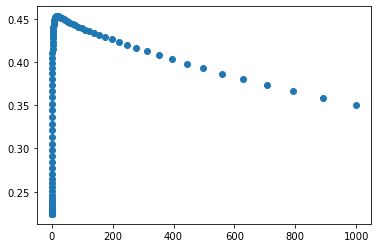

In [19]:
plt.scatter(gs_ridge.cv_results_['param_alpha'], gs_ridge.cv_results_['mean_test_score'])

C:\Users\tdcho\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Wall time: 3.01 s
{'alpha': 18.26530612244898}
0.4528263754534049


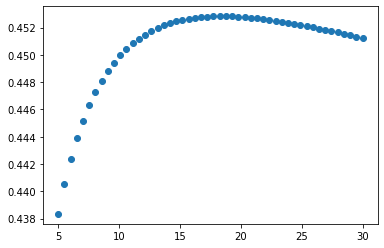

In [20]:
alphas = np.linspace(5, 30, 50)
gparam_ridge = [{'alpha': alphas}]

gs_ridge = GridSearchCV(ridge, gparam_ridge, cv=n_folds_lin)
%time gs_ridge.fit(hp_nolf_train, hp_lf_train)

print(gs_ridge.best_params_)
print(gs_ridge.best_score_)
plt.scatter(gs_ridge.cv_results_['param_alpha'], gs_ridge.cv_results_['mean_test_score'])

### Attempt with Lasso

C:\Users\tdcho\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Wall time: 3.55 s
{'alpha': 0.16297508346206444}
0.4703110313259734


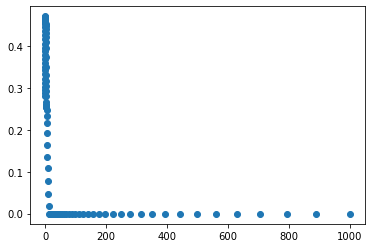

In [21]:
lasso = Lasso(random_state=0, max_iter=1000000)

alphas = np.logspace(-2, 3, 100)

gparam_lasso = [{'alpha': alphas}]

gs_lasso = GridSearchCV(lasso, gparam_lasso, cv=n_folds_lin, n_jobs=-1)
%time gs_lasso.fit(hp_nolf_train, hp_lf_train)

print(gs_lasso.best_params_)
print(gs_lasso.best_score_)

plt.scatter(gs_lasso.cv_results_['param_alpha'], gs_lasso.cv_results_['mean_test_score'])

C:\Users\tdcho\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Wall time: 959 ms
{'alpha': 0.16363636363636366}
0.47034496670089176


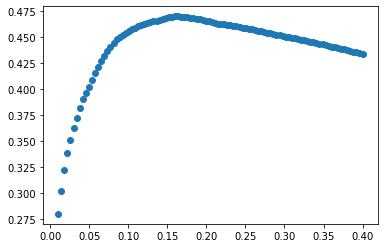

In [22]:
lasso = Lasso(random_state=0, max_iter=100000)

alphas = np.linspace(1e-2, 0.4, 100)

gparam_lasso = [{'alpha': alphas}]

gs_lasso = GridSearchCV(lasso, gparam_lasso, cv=n_folds_lin, n_jobs=-1)
%time gs_lasso.fit(hp_nolf_train, hp_lf_train)

print(gs_lasso.best_params_)
print(gs_lasso.best_score_)

plt.scatter(gs_lasso.cv_results_['param_alpha'], gs_lasso.cv_results_['mean_test_score'])

### Attempt with Gradient Boosting

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(random_state=0, loss='ls',
                                min_impurity_decrease=0.1, 
                                warm_start=False)

learningrate = [0.0001, 0.001, 0.01, 0.1, 1]
nestimators = [5, 10, 50, 100, 200, 500, 1000,
               1500, 2000, 5000]
# subsamples = np.linspace(0, 1, 100)
maxfeatures = [9, 40, len(hp_nolf_train.columns)]
maxdepth = range(1, 5)

ytrain_array_a = hp_lf_train.values.flatten()

gparam_gbm = [{'learning_rate': learningrate},
              {'n_estimators': nestimators},
              {'max_features': maxfeatures},
              {'max_depth': maxdepth}]

n_folds=ms.StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1)
%time gs_gbm.fit(hp_nolf_train, ytrain_array_a)

C:\Users\tdcho\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Wall time: 18.9 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.1,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,...
                                                 random_state=0, subsample=1.0,
                                                 tol=0.0001,
                      

In [24]:
print(gs_gbm.best_params_)
print(gs_gbm.best_score_)

gbm_imp_feat = sorted(zip(hp_nolf_train.columns, 
                          gs_gbm.best_estimator_.feature_importances_),
                      key=lambda t:t[1], reverse=True)

# print out most important features
gbm_imp_feat

{'max_features': 40}
0.5252206062023808


[('LotArea', 0.2629646429347836),
 ('MSSubClass_160', 0.054364920870477056),
 ('1stFlrSF', 0.052944664433196016),
 ('BldgType_TwnhsE', 0.046778878529130465),
 ('GarageArea', 0.04322522982527382),
 ('BldgType_Twnhs', 0.03747778594806388),
 ('TotalBsmtSF', 0.034725523423589144),
 ('LotConfig_CulDSac', 0.03443994290115447),
 ('MSZoning_RM', 0.030403526800948835),
 ('Condition1_PosA', 0.0295127403155785),
 ('GrLivArea', 0.026295663665359216),
 ('YearBuilt', 0.023684140840256957),
 ('LotConfig_Inside', 0.02337770503492195),
 ('TotRmsAbvGrd', 0.019693902041864178),
 ('LotShape_IR3', 0.019065143413598502),
 ('BsmtFinTotalSF', 0.013632872838090046),
 ('PoolArea', 0.011278113449241399),
 ('Exterior1st_Wd Sdng', 0.010689310146669411),
 ('RoofMatl_Tar&Grv', 0.010010040338733827),
 ('GarageType_Detchd', 0.0094744308900095),
 ('GarageCars', 0.008985813700827744),
 ('BsmtUnfSF', 0.008446721244081634),
 ('RoofMatl_CompShg', 0.006816990821395074),
 ('BedroomAbvGr', 0.006668100740501868),
 ('BsmtBaths'

In [25]:
# trim features so df will only have important features
gbm_top_important_features = [x[0] for x in gbm_imp_feat if x[1] > 0.0]

lf_tree_gbm = hp_full_strd_nolf[[*gbm_top_important_features]]
lf_tree_gbm

,LotArea,MSSubClass_160,1stFlrSF,BldgType_TwnhsE,GarageArea,BldgType_Twnhs,TotalBsmtSF,LotConfig_CulDSac,MSZoning_RM,Condition1_PosA,GrLivArea,YearBuilt,LotConfig_Inside,TotRmsAbvGrd,LotShape_IR3,BsmtFinTotalSF,PoolArea,Exterior1st_Wd Sdng,RoofMatl_Tar&Grv,GarageType_Detchd,GarageCars,BsmtUnfSF,RoofMatl_CompShg,BedroomAbvGr,BsmtBaths,MSSubClass_120,LandContour_HLS,LotShape_IR2,TotalPorchSF,LandSlope_Mod,LotConfig_FR2,MasVnrArea,PoolQC_Ex,WoodDeckSF,EnclosedPorch,Foundation_Wood,Heating_Grav,YearRemodAdd,MSZoning_RL,SaleType_New,PoolQC_Gd,LandContour_Lvl,Foundation_CBlock,YrsRemodToSold,MSSubClass_180,GarageType_Attchd,BsmtFinSF1,2ndFlrSF,OverallQual,GarageFinish_Unf,KitchenQual_Fa,Exterior2nd_Wd Sdng,GarageFinish_RFn,Neighborhood_Timber,MoSold,ScreenPorch,BsmtCond_Fa,BsmtQual_Ex,ExterQual_Fa,HouseStyle_2Story,Condition1_RRAn,LotShape_Reg,OpenPorchSF,LowQualFinSF,PavedDrive_P,HeatingQC_TA,KitchenQual_Gd,Decks,BsmtFinSF2,Street_Pave,Neighborhood_Gilbert,RoofStyle_Gable,Neighborhood_NridgHt,Condition1_RRNn,Alley_Grvl,ExterQual_TA,Porches,Neighborhood_SawyerW,BsmtCond_Gd,BsmtFinType2_Unf,TotalBaths,HouseStyle_1Story,Functional_Mod,Exterior1st_VinylSd,Neighborhood_NoRidge,LowQualFin,Fence_MnPrv,BsmtCond_TA,Neighborhood_ClearCr,GarageYrBlt,GarageType_Basment,Condition2_Feedr,Exterior2nd_VinylSd,RoofStyle_Hip,3SsnPorch,Fence_GdWo,Exterior1st_HdBoard,Neighborhood_StoneBr,Neighborhood_NAmes,LandContour_Low,HouseStyle_SLvl,Fence_MnWw,BsmtFinType1_BLQ,Exterior2nd_Plywood,MSSubClass_40,Neighborhood_Mitchel,RoofMatl_WdShngl,FullBath,Exterior1st_BrkFace,Neighborhood_Veenker,OverallCond,PavedDrive_Y,2ndFlr,GarageFinish_Fin,BsmtQual_TA,BsmtFinType1_Unf,Exterior2nd_BrkFace,Neighborhood_BrkSide,BsmtExposure_Gd,MasVnrType_Stone,MasVnrType_None,BsmtExposure_No,MSSubClass_50,BsmtQual_Gd,KitchenAbvGr,Exterior2nd_Brk Cmn,Foundation_PConc,SaleType_Oth,Condition1_Feedr,RoofStyle_Mansard,Condition1_RRAe,YrSold,MiscFeature_Othr,LandSlope_Sev,BsmtFinType1_Rec,ExterCond_Gd,Exterior1st_Plywood,Neighborhood_NPkVill,Functional_Typ,SaleType_WD,BsmtFinType2_BLQ,MSSubClass_60,HalfBath,Fireplaces,ExterQual_Gd
0,-0.207142,0.0,-0.793434,0,0.351000,0,-0.459303,0,0,0,0.370333,1.050994,1,0.912210,0,0.453441,-0.068692,0,0,0,0.311725,-0.944591,1,0.163779,1.060397,0.0,0,0,-0.248063,0,0,0.513191,0,-0.752176,-0.359325,0,0,0.878668,1,0,0,1,0,-0.869941,0.0,1,0.575425,1.161852,0.651479,0,0,0,1,0,-1.599111,-0.270208,0,0,0,1,0,1,0.216503,-0.120242,0,0,1,-0.958399,-0.288653,1,0,1,0,0,0,0,0.676081,0,0,1,1.169387,0,0,1,0,-0.134652,0,1,0,0.296026,0,0,1,0,-0.116339,0,0,0,0,0,0,0,0,0,0.0,0,0,0.789741,0,0,-0.517200,1,1.146206,0,0,0,0,0,0,0,0,1,0.0,1,-0.211454,0,1,0,0,0,0,0.138777,0,0,0,0,0,0,1,1,0,1.0,1.227585,-0.951226,1
1,-0.091886,0.0,0.257140,0,-0.060731,0,0.466465,0,0,0,-0.482512,0.156734,0,-0.318683,0,1.024942,-0.068692,0,0,0,0.311725,-0.641228,1,0.163779,0.089142,0.0,0,0,-0.828163,0,1,-0.571873,0,1.626195,-0.359325,0,0,-0.429577,1,0,0,1,1,0.390141,0.0,1,1.171992,-0.795163,-0.071836,0,0,0,1,0,-0.489110,-0.270208,0,0,0,0,0,1,-0.704483,-0.120242,0,0,0,1.043407,-0.288653,1,0,1,0,0,0,1,-1.479112,0,0,1,0.382973,1,0,0,0,-0.134652,0,1,0,0.236495,0,0,0,0,-0.116339,0,0,0,0,0,0,0,0,0,0.0,0,0,0.789741,0,1,2.179628,1,-0.872444,0,0,0,0,0,1,0,1,0,0.0,1,-0.211454,0,0,0,1,0,0,-0.614439,0,0,0,0,0,0,1,1,0,0.0,-0.761621,0.600495,0
2,0.073480,0.0,-0.627826,0,0.631726,0,-0.313369,0,0,0,0.515013,0.984752,1,-0.318683,0,-0.008802,-0.068692,0,0,0,0.311725,-0.301643,1,0.163779,1.060397,0.0,0,0,-0.428750,0,0,0.324966,0,-0.752176,-0.359325,0,0,0.830215,1,0,0,1,0,-0.821476,0.0,1,0.092907,1.189351,0.651479,0,0,0,1,0,0.990891,-0.270208,0,0,0,1,0,0,-0.070361,-0.120242,0,0,1,-0.958399,-0.288653,1,0,1,0,0,0,0,0.676081,0,0,1,1.169387,0,0,1,0,-0.134652,0,1,0,0.291616,0,0,1,0,-0.116339,0,0,0,0,0,0,0,0,0,0.0,0,0,0.789741,0,0,-0.517200,1,1.146206,0,0,0,0,0,0,0,0,0,0.0,1,-0.211454,0,1,0,0,0,0,0.138777,0,0,0,0,0,0,1,1,0,1.0,1.227585,0.600495,1
3,-0.096897,0.0,-0.521734,0,0.790804,0,-0.687324,0,0,0,0.383659,-1.863632,0

In [26]:
# revise training and test datasets
lf_tree_gbm_train = lf_tree_gbm.iloc[lf_notnull]

lf_tree_gbm_null = lf_tree_gbm.iloc[lf_isnull]

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(random_state=0, loss='ls',
                                min_impurity_decrease=0.1, 
                                warm_start=False)

learningrate = [0.0001, 0.001, 0.01, 0.1, 1] # subsequently, fine tune
nestimators = [5, 10, 50, 100, 200, 500, 1000,
               1500, 2000, 5000]
# subsamples = np.linspace(0, 1, 100)
maxfeatures = [9, 40, len(lf_tree_gbm_train.columns)]
maxdepth = range(1, 5)

ytrain_array = hp_lf_train.values.flatten()


gparam_gbm = [{'learning_rate': learningrate},
              {'n_estimators': nestimators},
#               {'subsample': subsamples}, 
              {'max_features': maxfeatures},
              {'max_depth': maxdepth}]

n_folds=ms.StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1)
%time gs_gbm.fit(lf_tree_gbm_train, hp_lf_train)

C:\Users\tdcho\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tdcho\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Wall time: 14.5 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.1,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,...
                                                 random_state=0, subsample=1.0,
                                                 tol=0.0001,
                      

In [28]:
print(gs_gbm.best_params_)
print(gs_gbm.best_score_)

# gbm_imp_feat = sorted(zip(hp_tree_nolf_train.columns, 
#                           gs_gbm.best_estimator_.feature_importances_), key=lambda t:t[1], reverse=True)
# gbm_imp_feat

{'max_depth': 4}
0.5391060914359702


In [29]:
grid_report = pd.DataFrame(gs_gbm.cv_results_)
grid_report.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
mean_fit_time,0.582869,0.578966,0.587573,0.582969,0.594678,0.039131,0.064152,0.291034,0.593577,1.170341,2.876814,5.375725,7.507639,8.385145,12.706823,0.064952,0.184048,0.587873,0.212271,0.423741,0.655127,0.768919
std_fit_time,0.011232,0.007416,0.005048,0.010793,0.016968,0.002655,0.00097,0.003029,0.012111,0.007877,0.011782,0.0588,0.018889,0.111189,0.06427,0.000584,0.005647,0.01008,0.004008,0.017508,0.053673,0.039448
mean_score_time,0.004404,0.004304,0.004603,0.004614,0.004504,0.004003,0.004104,0.004103,0.004204,0.004804,0.005905,0.006305,0.007306,0.006906,0.007806,0.004403,0.004103,0.004203,0.004103,0.004904,0.004304,0.004103
std_score_time,0.000374,0.000245,0.000374,0.000359,0.0,0.000317,0.0002,0.0002,0.000245,0.000245,0.0002,0.000749,0.000401,0.0002,0.000245,0.0002,0.0002,0.000245,0.0002,0.001563,0.000245,0.000374
param_learning_rate,0.0001,0.001,0.01,0.1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
param_n_estimators,NaN,NaN,NaN,NaN,NaN,5,10,50,100,200,500,1000,1500,2000,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
param_max_features,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,40,145,NaN,NaN,NaN,NaN
param_max_depth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,3,4
params,{'learning_rate': 0.0001},{'learning_rate': 0.001},{'learning_rate': 0.01},{'learning_rate': 0.1},{'learning_rate': 1},{'n_estimators': 5},{'n_estimators': 10},{'n_estimators': 50},{'n_estimators': 100},{'n_estimators': 200},{'n_estimators': 500},{'n_estimators': 1000},{'n_estimators': 1500},{'n_estimators': 2000},{'n_estimators': 5000},{'max_features': 9},{'max_features': 40},{'max_features': 145},{'max_depth': 1},{'max_depth': 2},{'max_depth': 3},{'max_depth': 4}
split0_test_score,0.006181,0.058152,0.303222,0.454448,0.244834,0.215179,0.303247,0.422724,0.454448,0.470075,0.478227,0.47679,0.477542,0.477446,0.477446,0.39967,0.434138,0.454448,0.402861,0.441483,0.454448,0.439022


In [30]:
grid_report.sort_values('mean_test_score', ascending=False).head().T

,21,16,20,3,17
mean_fit_time,0.768919,0.184048,0.655127,0.582969,0.587873
std_fit_time,0.039448,0.005647,0.053673,0.010793,0.01008
mean_score_time,0.004103,0.004103,0.004304,0.004614,0.004203
std_score_time,0.000374,0.0002,0.000245,0.000359,0.000245
param_learning_rate,NaN,NaN,NaN,0.1,NaN
param_n_estimators,NaN,NaN,NaN,NaN,NaN
param_max_features,NaN,40,NaN,NaN,145
param_max_depth,4,NaN,3,NaN,NaN
params,{'max_depth': 4},{'max_features': 40},{'max_depth': 3},{'learning_rate': 0.1},{'max_features': 145}
split0_test_score,0.439022,0.434138,0.454448,0.454448,0.454448


## Retry with even smaller set

In [31]:
# trim features so df will only have important features
gbm_top_important_features = [x[0] for x in gbm_imp_feat if x[1] > 0.001]

lf_tree_gbm = hp_full_strd_nolf[[*gbm_top_important_features]]
lf_tree_gbm

,LotArea,MSSubClass_160,1stFlrSF,BldgType_TwnhsE,GarageArea,BldgType_Twnhs,TotalBsmtSF,LotConfig_CulDSac,MSZoning_RM,Condition1_PosA,GrLivArea,YearBuilt,LotConfig_Inside,TotRmsAbvGrd,LotShape_IR3,BsmtFinTotalSF,PoolArea,Exterior1st_Wd Sdng,RoofMatl_Tar&Grv,GarageType_Detchd,GarageCars,BsmtUnfSF,RoofMatl_CompShg,BedroomAbvGr,BsmtBaths,MSSubClass_120,LandContour_HLS,LotShape_IR2,TotalPorchSF,LandSlope_Mod,LotConfig_FR2,MasVnrArea,PoolQC_Ex,WoodDeckSF,EnclosedPorch,Foundation_Wood,Heating_Grav,YearRemodAdd,MSZoning_RL,SaleType_New,PoolQC_Gd,LandContour_Lvl,Foundation_CBlock,YrsRemodToSold,MSSubClass_180,GarageType_Attchd,BsmtFinSF1,2ndFlrSF,OverallQual,GarageFinish_Unf,KitchenQual_Fa,Exterior2nd_Wd Sdng,GarageFinish_RFn,Neighborhood_Timber,MoSold,ScreenPorch,BsmtCond_Fa,BsmtQual_Ex,ExterQual_Fa,HouseStyle_2Story,Condition1_RRAn,LotShape_Reg,OpenPorchSF,LowQualFinSF,PavedDrive_P,HeatingQC_TA,KitchenQual_Gd,Decks,BsmtFinSF2,Street_Pave,Neighborhood_Gilbert,RoofStyle_Gable
0,-0.207142,0.0,-0.793434,0,0.351000,0,-0.459303,0,0,0,0.370333,1.050994,1,0.912210,0,0.453441,-0.068692,0,0,0,0.311725,-0.944591,1,0.163779,1.060397,0.0,0,0,-0.248063,0,0,0.513191,0,-0.752176,-0.359325,0,0,0.878668,1,0,0,1,0,-0.869941,0.0,1,0.575425,1.161852,0.651479,0,0,0,1,0,-1.599111,-0.270208,0,0,0,1,0,1,0.216503,-0.120242,0,0,1,-0.958399,-0.288653,1,0,1
1,-0.091886,0.0,0.257140,0,-0.060731,0,0.466465,0,0,0,-0.482512,0.156734,0,-0.318683,0,1.024942,-0.068692,0,0,0,0.311725,-0.641228,1,0.163779,0.089142,0.0,0,0,-0.828163,0,1,-0.571873,0,1.626195,-0.359325,0,0,-0.429577,1,0,0,1,1,0.390141,0.0,1,1.171992,-0.795163,-0.071836,0,0,0,1,0,-0.489110,-0.270208,0,0,0,0,0,1,-0.704483,-0.120242,0,0,0,1.043407,-0.288653,1,0,1
2,0.073480,0.0,-0.627826,0,0.631726,0,-0.313369,0,0,0,0.515013,0.984752,1,-0.318683,0,-0.008802,-0.068692,0,0,0,0.311725,-0.301643,1,0.163779,1.060397,0.0,0,0,-0.428750,0,0,0.324966,0,-0.752176,-0.359325,0,0,0.830215,1,0,0,1,0,-0.821476,0.0,1,0.092907,1.189351,0.651479,0,0,0,1,0,0.990891,-0.270208,0,0,0,1,0,0,-0.070361,-0.120242,0,0,1,-0.958399,-0.288653,1,0,1
3,-0.096897,0.0,-0.521734,0,0.790804,0,-0.687324,0,0,0,0.383659,-1.863632,0,0.296763,0,-0.576100,-0.068692,1,0,1,1.650307,-0.061670,1,0.163779,1.060397,0.0,0,0,2.091355,0,0,-0.571873,0,-0.752176,4.092524,0,0,-0.720298,1,0,0,1,0,0.632464,0.0,0,-0.499274,0.937276,0.651479,1,0,0,0,0,-1.599111,-0.270208,0,0,0,1,0,0,-0.176048,-0.120242,0,0,1,-0.958399,-0.288653,1,0,1
4,0.375148,0.0,-0.045611,0,1.698485,0,0.199680,0,0,0,1.299326,0.951632,0,1.527656,0,0.346285,-0.068692,0,0,0,1.650307,-0.174865,1,1.390023,1.060397,0.0,0,0,-0.029337,0,1,1.365741,0,0.780197,-0.359325,0,0,0.733308,1,0,0,1,0,-0.724547,0.0,1,0.463568,1.617877,1.374795,0,0,0,1,0,2.100892,-0.270208,0,0,0,1,0,0,0.563760,-0.120242,0,0,1,1.043407,-0.288653,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,0.0,-0.542435,0,-0.060731,0,-0.238122,0,0,0,0.250402,0.918511,1,0.296763,0,-1.029938,-0.068692,0,0,0,0.311725,0.873321,1,0.163779,-0.882112,0.0,0,0,-0.447770,0,0,-0.571873,0,-0.752176,-0.359325,0,0,0.733308,1,0,0,1,0,-0.773012,0.0,1,-0.973018,0.795198,-0.071836,0,0,0,1,0,0.620891,-0.270208,0,0,0,1,0,1,-0.100558,-0.120242,0,0,0,-0.958399,-0.288653,1,1,1
1456,0.266407,0.0,2.355701,0,0.126420,0,1.104925,0,0,0,1.061367,0.222975,1,0.296763,0,0.972414,-0.068692,0,0,0,0.311725,0.049262,1,0.163779,1.060397,0.0,0,0,-0.828163,0,0,0.086916,0,2.033231,-0.359325,0,0,0.151865,1,0,0,1,1,-0.046041,0.0,1,0.759659,-0.795163,-0.071836,1,0,0,0,0,-1.599111,-0.270208,0,0,0,0,0,1,-0.704483,-0.120242,0,1,0,1.043407,0.722112,1,0,1
1457,-0.147810,0.0,0.065656,0,-1.033914,0,0.215641,0,0,0,1.569647,-1.002492,1,1.527656,0,-0.452135,-0.068692,0,0,0,-1.026858,0.701265,1,1.390023,-0.882112,0.0,0,0,-0.257573,0,0,-0.571

In [32]:
# revise training and test datasets
lf_tree_gbm_train = lf_tree_gbm.iloc[lf_notnull]

lf_tree_gbm_null = lf_tree_gbm.iloc[lf_isnull]

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(random_state=0, loss='ls',
                                min_impurity_decrease=0.1, 
                                warm_start=False)

learningrate = [0.0001, 0.001, 0.01, 0.1, 1] # subsequently, fine tune
nestimators = [5, 10, 50, 100, 200, 500, 1000,
               1500, 2000, 5000]
# subsamples = np.linspace(0, 1, 100)
maxfeatures = [9, 40, len(lf_tree_gbm_train.columns)]
maxdepth = range(1, 5)

ytrain_array = hp_lf_train.values.flatten()


gparam_gbm = [{'learning_rate': learningrate},
              {'n_estimators': nestimators},
#               {'subsample': subsamples}, 
              {'max_features': maxfeatures},
              {'max_depth': maxdepth}]

n_folds=ms.StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1)
%time gs_gbm.fit(lf_tree_gbm_train, hp_lf_train)

C:\Users\tdcho\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tdcho\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Wall time: 10.5 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.1,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,...
                                                 random_state=0, subsample=1.0,
                                                 tol=0.0001,
                      

In [34]:
print(gs_gbm.best_params_)
print(gs_gbm.best_score_)

# gbm_imp_feat = sorted(zip(hp_tree_nolf_train.columns, 
#                           gs_gbm.best_estimator_.feature_importances_), key=lambda t:t[1], reverse=True)
# gbm_imp_feat

{'max_depth': 4}
0.5472172616484317


In [35]:
grid_report = pd.DataFrame(gs_gbm.cv_results_)
grid_report.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
mean_fit_time,0.419736,0.432648,0.432548,0.448961,0.439353,0.046337,0.060349,0.232887,0.443157,0.837674,2.039441,3.854701,5.396941,6.064078,9.304885,0.080165,0.246598,0.418136,0.156025,0.293436,0.417335,0.52262
std_fit_time,0.0112,0.033349,0.024762,0.026309,0.022079,0.016377,0.010355,0.014772,0.023651,0.026484,0.030647,0.030213,0.023752,0.042126,0.07315,0.005718,0.008406,0.013388,0.003218,0.019677,0.018997,0.01486
mean_score_time,0.003703,0.003503,0.004304,0.004204,0.004103,0.004503,0.004203,0.003903,0.003603,0.004003,0.005204,0.005404,0.006405,0.006305,0.007807,0.004003,0.003603,0.003613,0.003603,0.003903,0.004103,0.003803
std_score_time,0.000245,0.0,0.000873,0.000928,0.000375,0.002027,0.000928,0.000584,0.0002,0.0,0.0004,0.00049,0.000801,0.000245,0.001124,0.000775,0.0002,0.000196,0.0002,0.000584,0.0002,0.000246
param_learning_rate,0.0001,0.001,0.01,0.1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
param_n_estimators,NaN,NaN,NaN,NaN,NaN,5,10,50,100,200,500,1000,1500,2000,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
param_max_features,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,40,72,NaN,NaN,NaN,NaN
param_max_depth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,3,4
params,{'learning_rate': 0.0001},{'learning_rate': 0.001},{'learning_rate': 0.01},{'learning_rate': 0.1},{'learning_rate': 1},{'n_estimators': 5},{'n_estimators': 10},{'n_estimators': 50},{'n_estimators': 100},{'n_estimators': 200},{'n_estimators': 500},{'n_estimators': 1000},{'n_estimators': 1500},{'n_estimators': 2000},{'n_estimators': 5000},{'max_features': 9},{'max_features': 40},{'max_features': 72},{'max_depth': 1},{'max_depth': 2},{'max_depth': 3},{'max_depth': 4}
split0_test_score,0.006181,0.058152,0.30309,0.467166,0.047128,0.215179,0.30341,0.44373,0.467166,0.47427,0.476495,0.474999,0.472424,0.47202,0.47202,0.445453,0.468268,0.467166,0.402861,0.462953,0.467166,0.483557


In [36]:
grid_report.sort_values('mean_test_score', ascending=False).head().T

,21,15,16,20,3
mean_fit_time,0.52262,0.080165,0.246598,0.417335,0.448961
std_fit_time,0.01486,0.005718,0.008406,0.018997,0.026309
mean_score_time,0.003803,0.004003,0.003603,0.004103,0.004204
std_score_time,0.000246,0.000775,0.0002,0.0002,0.000928
param_learning_rate,NaN,NaN,NaN,NaN,0.1
param_n_estimators,NaN,NaN,NaN,NaN,NaN
param_max_features,NaN,9,40,NaN,NaN
param_max_depth,4,NaN,NaN,3,NaN
params,{'max_depth': 4},{'max_features': 9},{'max_features': 40},{'max_depth': 3},{'learning_rate': 0.1}
split0_test_score,0.483557,0.445453,0.468268,0.467166,0.467166


### The Above Models do not seem to produce the best results

- We will use KNNImputer instead

## KNN Imputer

- Since none of the above seemed to do a good job of imputing the values for 'LotFrontage'

In [37]:
knn = KNNImputer(n_neighbors=3, weights="uniform")
knn_lf = knn.fit_transform(hp_full_strd_nolf[['LotFrontage']])

hp_full_strd_nolf[['LotFrontage']] = knn_lf

hp_full_strd = hp_full_strd_nolf.copy()

hp_full_strd.isna().values.any()

False

In [38]:
hp_full_strd[hp_full_strd['LotFrontage'].isna()]['LotFrontage']

Series([], Name: LotFrontage, dtype: float64)

In [39]:
hp_full_strd[hp_full_strd['LotFrontage'].isna()]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalBaths,BsmtBaths,BsmtFinTotalSF,BsmtUnfin,2ndFlr,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_DNE,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_DNE,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_DNE,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_DNE,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleT

In [40]:
hp_full_strd['LotFrontage']

0      -0.208034
1       0.409895
2      -0.084449
3      -0.414011
4       0.574676
          ...   
1455   -0.331620
1456    0.615871
1457   -0.166839
1458   -0.084449
1459    0.203918
Name: LotFrontage, Length: 1460, dtype: float64

In [41]:
%store hp_full_strd

Stored 'hp_full_strd' (DataFrame)
